In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train Inner

In [2]:
train_inner = pd.read_csv('application_train_inner_merged.csv')

train_inner.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_CONTRACT_STATUS_Signed,MONTHS_BALANCE,MONTHS_BALANCE.1,CNT_INSTALMENT_LOG,CNT_INSTALMENT_LOG.1,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,DAYS_ENTRY_PAYMENT_RATIO,AMT_PAYMENT_DIFFERENCES
0,100048,0,0,0,0,1,12.218495,6,6,4,...,0.0,1.266472,0.767749,0.043016,0.688250,0.768120,0.776268,7.821250,-0.000708,0.188409
1,100135,0,0,1,0,1,11.813030,6,1,4,...,0.0,1.266472,-0.191334,0.215436,6.032220,0.659363,0.637333,9.684913,0.061707,0.188409
2,100139,0,0,0,0,0,11.967181,1,6,4,...,0.0,1.266472,-1.917683,-0.965957,-33.808493,-0.069429,-0.064093,8.788192,0.016936,0.066424
3,100180,0,0,0,0,1,12.660328,6,1,1,...,0.0,0.691023,0.038846,-0.214046,-4.280917,0.305974,0.303667,9.560450,0.013983,-1.224114
4,100211,0,0,1,0,0,12.323856,6,1,4,...,0.0,1.266472,0.691023,0.414555,6.632886,1.017882,1.026054,8.375453,0.015802,-0.126746


In [6]:
train_inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11043 entries, 0 to 11042
Columns: 109 entries, SK_ID_CURR to AMT_PAYMENT_DIFFERENCES
dtypes: float64(57), int64(52)
memory usage: 9.2 MB


In [8]:
train_inner.isnull().sum()

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
                           ..
DAYS_INSTALMENT             0
DAYS_ENTRY_PAYMENT          0
AMT_INSTALMENT              0
DAYS_ENTRY_PAYMENT_RATIO    0
AMT_PAYMENT_DIFFERENCES     0
Length: 109, dtype: int64

In [10]:
train_inner.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11038    False
11039    False
11040    False
11041    False
11042    False
Length: 11043, dtype: bool

### Default Rate_Inner

In [13]:
# nama dataset = application_train_inner_merged

# Hitung total peminjam
total_peminjam = len(train_inner)

# Hitung jumlah peminjam yang default (TARGET = 1)
jumlah_default = train_inner['TARGET'].sum()

# Hitung default rate
default_rate_inner = (jumlah_default / total_peminjam) * 100

print(f'Default Rate_Inner Join: {default_rate_inner:.2f}%')

Default Rate_Inner Join: 9.84%


### Distribusi Target : Inner Join

In [16]:
# Menghitung berapa banyak jumlah 0 dan 1 pada TARGET

target_counts_inner = train_inner['TARGET'].value_counts()
print(target_counts_inner)

TARGET
0    9956
1    1087
Name: count, dtype: int64


### Proporsi Target_Inner Join

In [19]:
# Untuk mengetahui ketidakseimbangan data

target_proportions_inner = train_inner['TARGET'].value_counts(normalize=True)
print(target_proportions_inner)

TARGET
0    0.901567
1    0.098433
Name: proportion, dtype: float64


### Data mentah tanpa pre-processing

In [22]:
X = train_inner.drop(columns = ['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

y.value_counts(normalize = True)

TARGET
0    0.901567
1    0.098433
Name: proportion, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Accuracy (Train Set)    : 0.90
Accuracy (Test Set)     : 0.91
Precision (Train Set)   : 0.00
Precision (Test Set)    : 0.00
Recall (Train Set)      : 0.00
Recall (Test Set)       : 0.00
F1-Score (Train Set)    : 0.00
F1-Score (Test Set)     : 0.00
ROC-AUC (Train-Proba)   : 0.62
ROC-AUC (Test-Proba)    : 0.63
Recall (Crossval Train) : 0.00
Recall (Crossval Test)  : 0.00


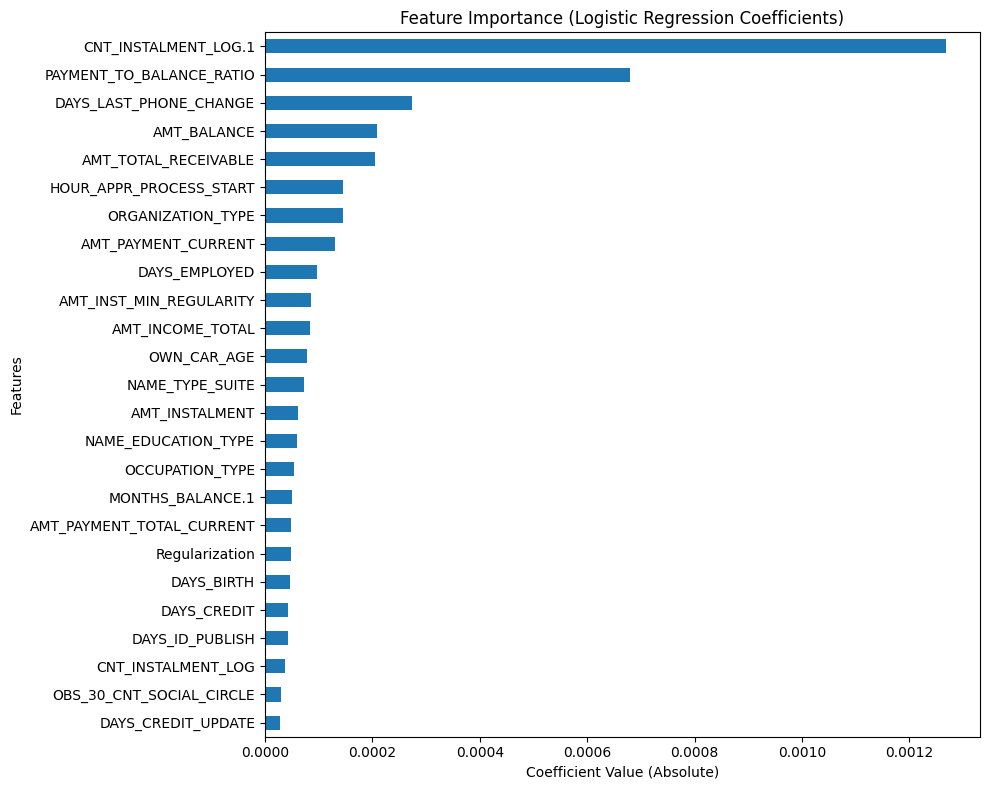

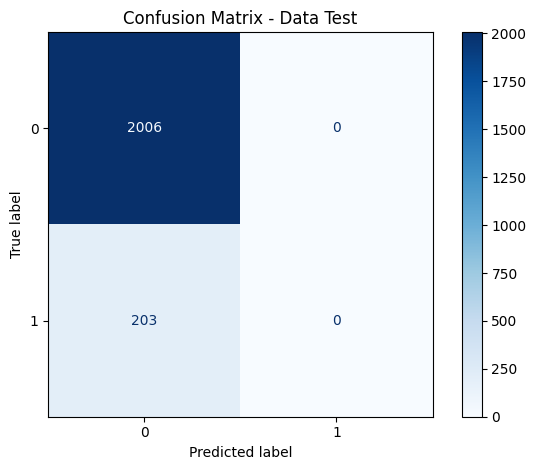

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Set max_iter to ensure convergence
log_reg.fit(X_train, y_train)

# Evaluasi model dengan metrik seperti accuracy, precision, recall, dsb.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def eval_classification(model):
    y_pred = model.predict(X_test)  # Prediksi untuk data test
    y_pred_train = model.predict(X_train)  # Prediksi untuk data train
    y_pred_proba = model.predict_proba(X_test)  # Probabilitas prediksi untuk data test
    y_pred_proba_train = model.predict_proba(X_train)  # Probabilitas prediksi untuk data train
    
    # Mencetak hasil evaluasi
    print('Accuracy (Train Set)    : %.2f' % accuracy_score(y_train, y_pred_train))
    print('Accuracy (Test Set)     : %.2f' % accuracy_score(y_test, y_pred))

    print('Precision (Train Set)   : %.2f' % precision_score(y_train, y_pred_train))
    print('Precision (Test Set)    : %.2f' % precision_score(y_test, y_pred))

    print('Recall (Train Set)      : %.2f' % recall_score(y_train, y_pred_train))
    print('Recall (Test Set)       : %.2f' % recall_score(y_test, y_pred))

    print('F1-Score (Train Set)    : %.2f' % f1_score(y_train, y_pred_train))
    print('F1-Score (Test Set)     : %.2f' % f1_score(y_test, y_pred))

    print('ROC-AUC (Train-Proba)   : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print('ROC-AUC (Test-Proba)    : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

# Evaluasi model
eval_classification(log_reg)

# Cross-validation untuk mengukur performa model secara lebih robust
from sklearn.model_selection import cross_validate
def score_cross_validate(model):
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (Crossval Train) : %.2f' % score['train_score'].mean())
    print('Recall (Crossval Test)  : %.2f' % score['test_score'].mean())

score_cross_validate(log_reg)

# Menampilkan fitur yang paling penting berdasarkan model
import pandas as pd
import matplotlib.pyplot as plt

def show_feature_importance(model):
    # Use the model's coefficients as feature importance
    feat_importances = pd.Series(model.coef_[0], index=X.columns)
    ax = feat_importances.abs().nlargest(25).plot(kind='barh', figsize=(10, 8))  # Use absolute values for importance
    ax.invert_yaxis()  # Reverse the order for better visualization
    plt.title('Feature Importance (Logistic Regression Coefficients)')
    plt.xlabel('Coefficient Value (Absolute)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# Call the function
show_feature_importance(log_reg)

# Menampilkan confusion matrix untuk hasil prediksi
def show_confusion_matrix(model):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Data Test')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(log_reg)

In [30]:
def calculate_default_rate(model, X, y, dataset_name="dataset"):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Mengonversi probabilitas menjadi prediksi default (threshold 0.5)
    y_pred_default = (y_pred_proba > 0.5).astype(int)
    
    # Menghitung jumlah prediksi default (jumlah yang diprediksi = 1)
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"Default rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")

In [32]:
# 9. Menghitung default rate untuk train dan test set
calculate_default_rate(log_reg, X_train, y_train, dataset_name="train")
calculate_default_rate(log_reg, X_test, y_test, dataset_name="test")

Default rate untuk dataset train:
Jumlah prediksi default: 1
Jumlah total: 8834
Tingkat default prediksi: 0.01%
Default rate untuk dataset test:
Jumlah prediksi default: 0
Jumlah total: 2209
Tingkat default prediksi: 0.00%


### Undersampling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# Assuming 'train_inner' is your dataset
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Apply undersampling to balance the dataset
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [6]:
# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Predictions for train and test sets
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

# Predict probabilities for ROC-AUC calculation
y_train_proba = model.predict_proba(X_train_resampled)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train_resampled, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train_resampled, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train_resampled, y_train_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Print evaluation metrics
print(f'Accuracy (Train Set): {train_accuracy:.2f}')
print(f'Accuracy (Test Set): {test_accuracy:.2f}')
print(f'Precision (Train Set): {train_precision:.2f}')
print(f'Precision (Test Set): {test_precision:.2f}')
print(f'Recall (Train Set): {train_recall:.2f}')
print(f'Recall (Test Set): {test_recall:.2f}')
print(f'F1-Score (Train Set): {train_f1:.2f}')
print(f'F1-Score (Test Set): {test_f1:.2f}')
print(f'ROC-AUC (Train-Proba): {train_roc_auc:.2f}')
print(f'ROC-AUC (Test-Proba): {test_roc_auc:.2f}')

Accuracy (Train Set): 0.57
Accuracy (Test Set): 0.63
Precision (Train Set): 0.58
Precision (Test Set): 0.13
Recall (Train Set): 0.50
Recall (Test Set): 0.48
F1-Score (Train Set): 0.54
F1-Score (Test Set): 0.20
ROC-AUC (Train-Proba): 0.61
ROC-AUC (Test-Proba): 0.60


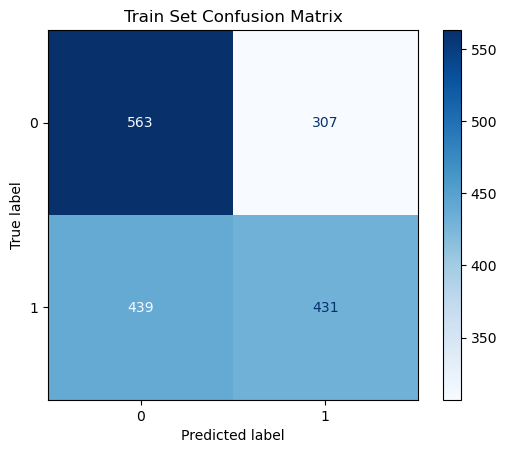

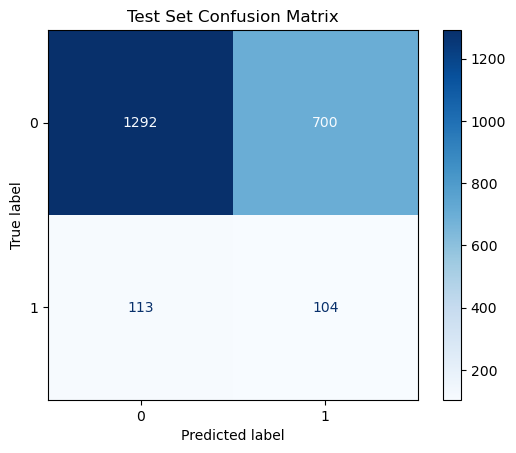

In [12]:
# Visualize Confusion Matrices for Train and Test Sets
train_cm = confusion_matrix(y_train_resampled, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display Train Confusion Matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=model.classes_)
disp_train.plot(cmap="Blues")
plt.title("Train Set Confusion Matrix")
plt.show()

# Display Test Confusion Matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=model.classes_)
disp_test.plot(cmap="Blues")
plt.title("Test Set Confusion Matrix")
plt.show()

In [8]:
def calculate_default_rate(model, X, y, dataset_name="dataset"):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]  # Menggunakan prediksi probabilitas
    
    # Mengonversi probabilitas menjadi prediksi default (threshold 0.5)
    y_pred_default = (y_pred_proba > 0.5).astype(int)
    
    # Menghitung jumlah prediksi default (jumlah yang diprediksi = 1)
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"\nDefault rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")
    return default_rate

In [9]:
# Default rate untuk Train Set
train_default_rate = calculate_default_rate(model, X_train_resampled, y_train_resampled, dataset_name="Train Set")

# Default rate untuk Test Set
test_default_rate = calculate_default_rate(model, X_test, y_test, dataset_name="Test Set")


Default rate untuk dataset Train Set:
Jumlah prediksi default: 738
Jumlah total: 1740
Tingkat default prediksi: 42.41%

Default rate untuk dataset Test Set:
Jumlah prediksi default: 804
Jumlah total: 2209
Tingkat default prediksi: 36.40%


### Class Weight

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# Assuming 'train_inner' is your dataset
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Train Logistic Regression model with class_weight='balanced'
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [6]:
# Predictions for train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Predict probabilities for ROC-AUC calculation
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Print evaluation metrics
print(f'Accuracy (Train Set): {train_accuracy:.2f}')
print(f'Accuracy (Test Set): {test_accuracy:.2f}')
print(f'Precision (Train Set): {train_precision:.2f}')
print(f'Precision (Test Set): {test_precision:.2f}')
print(f'Recall (Train Set): {train_recall:.2f}')
print(f'Recall (Test Set): {test_recall:.2f}')
print(f'F1-Score (Train Set): {train_f1:.2f}')
print(f'F1-Score (Test Set): {test_f1:.2f}')
print(f'ROC-AUC (Train-Proba): {train_roc_auc:.2f}')
print(f'ROC-AUC (Test-Proba): {test_roc_auc:.2f}')

Accuracy (Train Set): 0.63
Accuracy (Test Set): 0.64
Precision (Train Set): 0.13
Precision (Test Set): 0.13
Recall (Train Set): 0.50
Recall (Test Set): 0.46
F1-Score (Train Set): 0.21
F1-Score (Test Set): 0.20
ROC-AUC (Train-Proba): 0.61
ROC-AUC (Test-Proba): 0.60



Confusion Matrix (Train Set):
[[5170 2794]
 [ 438  432]]

Confusion Matrix (Test Set):
[[1318  674]
 [ 118   99]]


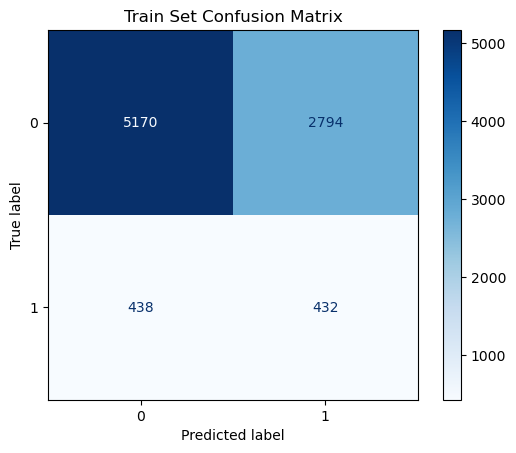

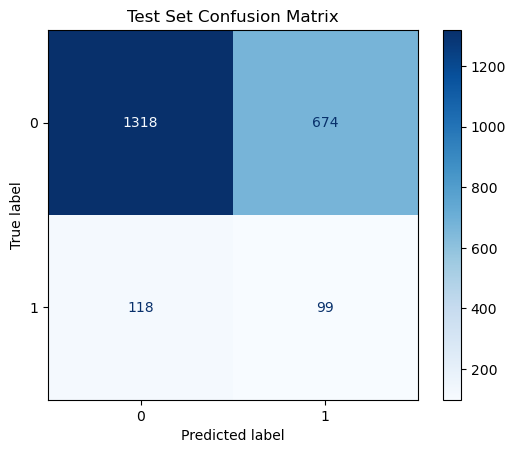

In [7]:
# Confusion Matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix (Train Set):")
print(train_cm)
print("\nConfusion Matrix (Test Set):")
print(test_cm)

# Visualize Confusion Matrices
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=model.classes_)
disp_train.plot(cmap="Blues")
plt.title("Train Set Confusion Matrix")
plt.show()


disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=model.classes_)
disp_test.plot(cmap="Blues")
plt.title("Test Set Confusion Matrix")
plt.show()

In [8]:
def calculate_default_rate(model, X, y, dataset_name="dataset"):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]  # Menggunakan prediksi probabilitas
    
    # Mengonversi probabilitas menjadi prediksi default (threshold 0.5)
    y_pred_default = (y_pred_proba > 0.5).astype(int)
    
    # Menghitung jumlah prediksi default (jumlah yang diprediksi = 1)
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"\nDefault rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")
    return default_rate

In [9]:
# Default rate untuk Train Set
train_default_rate = calculate_default_rate(model, X_train, y_train, dataset_name="Train Set")

# Default rate untuk Test Set
test_default_rate = calculate_default_rate(model, X_test, y_test, dataset_name="Test Set")


Default rate untuk dataset Train Set:
Jumlah prediksi default: 3226
Jumlah total: 8834
Tingkat default prediksi: 36.52%

Default rate untuk dataset Test Set:
Jumlah prediksi default: 773
Jumlah total: 2209
Tingkat default prediksi: 34.99%


### Hadling Outliers (IQR)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [36]:
X = train_inner.drop(columns = ['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
# Proses IQR pada data train
def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers pada data train
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Pilih kolom numerik untuk IQR
numeric_columns = X_train.select_dtypes(include=np.number).columns

# Terapkan IQR hanya pada data train
X_train = handle_outliers_iqr(X_train.copy(), numeric_columns)

# Terapkan capping pada data test menggunakan batas dari data train
def apply_train_iqr_bounds(data, train_data, columns):
    for col in columns:
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers pada data test
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

X_test = apply_train_iqr_bounds(X_test.copy(), X_train, numeric_columns)

Accuracy (Train Set)    : 0.90
Accuracy (Test Set)     : 0.91
Precision (Train Set)   : 0.00
Precision (Test Set)    : 0.00
Recall (Train Set)      : 0.00
Recall (Test Set)       : 0.00
F1-Score (Train Set)    : 0.00
F1-Score (Test Set)     : 0.00
ROC-AUC (Train-Proba)   : 0.63
ROC-AUC (Test-Proba)    : 0.63


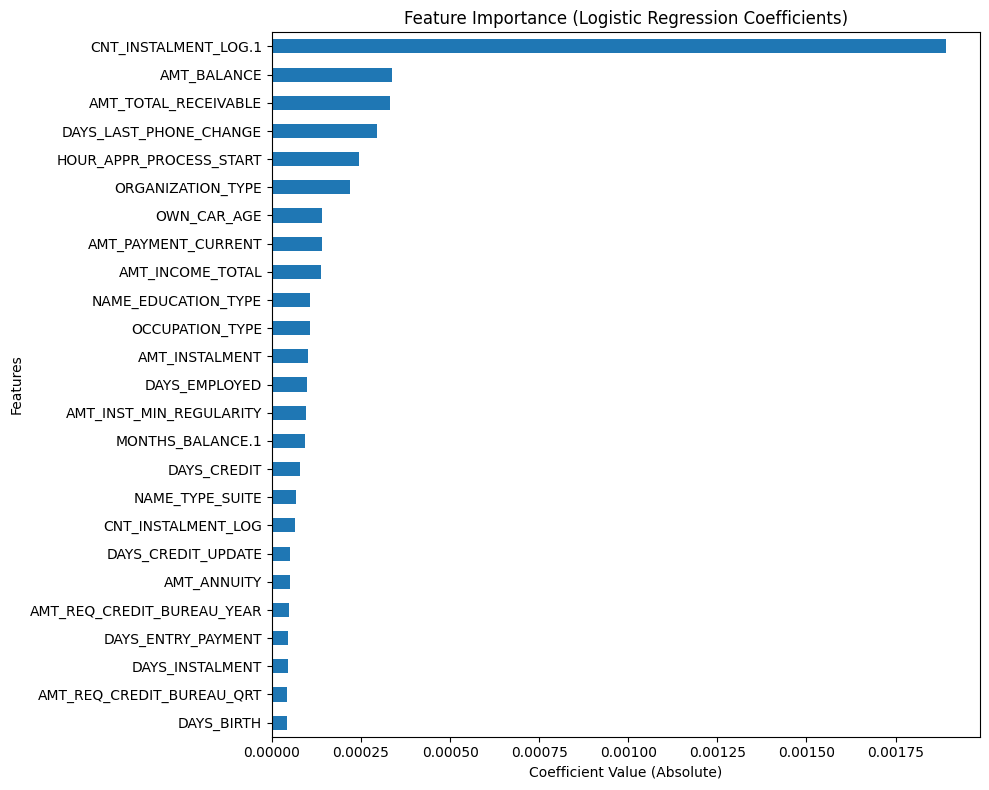

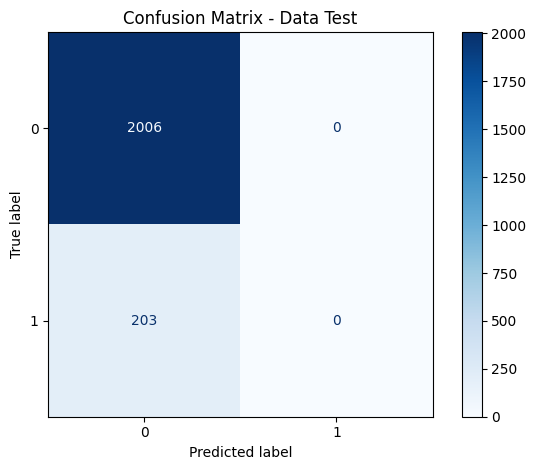

In [40]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Set max_iter to ensure convergence
log_reg.fit(X_train, y_train)

# Evaluasi model
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print('Accuracy (Train Set)    : %.2f' % accuracy_score(y_train, y_pred_train))
    print('Accuracy (Test Set)     : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Train Set)   : %.2f' % precision_score(y_train, y_pred_train))
    print('Precision (Test Set)    : %.2f' % precision_score(y_test, y_pred))
    print('Recall (Train Set)      : %.2f' % recall_score(y_train, y_pred_train))
    print('Recall (Test Set)       : %.2f' % recall_score(y_test, y_pred))
    print('F1-Score (Train Set)    : %.2f' % f1_score(y_train, y_pred_train))
    print('F1-Score (Test Set)     : %.2f' % f1_score(y_test, y_pred))
    print('ROC-AUC (Train-Proba)   : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print('ROC-AUC (Test-Proba)    : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

eval_classification(log_reg)

# Menampilkan fitur yang paling penting berdasarkan model
def show_feature_importance(model):
    # Use the model's coefficients as feature importance
    feat_importances = pd.Series(model.coef_[0], index=X.columns)
    ax = feat_importances.abs().nlargest(25).plot(kind='barh', figsize=(10, 8))  # Use absolute values for importance
    ax.invert_yaxis()  # Reverse the order for better visualization
    plt.title('Feature Importance (Logistic Regression Coefficients)')
    plt.xlabel('Coefficient Value (Absolute)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# Call the function
show_feature_importance(log_reg)

# Menampilkan confusion matrix untuk hasil prediksi
def show_confusion_matrix(model):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Data Test')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(log_reg)

In [42]:
def calculate_default_rate(model, X, y, dataset_name="dataset", threshold=0.5):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    - threshold: Batas probabilitas untuk menentukan prediksi default (default: 0.5).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Mengonversi probabilitas menjadi prediksi default
    y_pred_default = (y_pred_proba > threshold).astype(int)
    
    # Menghitung jumlah prediksi default dan total
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"Default rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")
    
    return default_rate

In [44]:
# Menghitung default rate untuk data train dan test
train_default_rate = calculate_default_rate(log_reg, X_train, y_train, dataset_name="train")
test_default_rate = calculate_default_rate(log_reg, X_test, y_test, dataset_name="test")

Default rate untuk dataset train:
Jumlah prediksi default: 0
Jumlah total: 8834
Tingkat default prediksi: 0.00%
Default rate untuk dataset test:
Jumlah prediksi default: 0
Jumlah total: 2209
Tingkat default prediksi: 0.00%


### SMOTE tanpa IQR

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
# Split dataset menjadi data train dan test
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
# Terapkan SMOTE pada data train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:")
print(y_train_smote.value_counts(normalize=True))

Distribusi kelas setelah SMOTE:
TARGET
0    0.5
1    0.5
Name: proportion, dtype: float64


Accuracy (Train Set)    : 0.50
Accuracy (Test Set)     : 0.90
Precision (Train Set)   : 0.00
Precision (Test Set)    : 0.00
Recall (Train Set)      : 0.00
Recall (Test Set)       : 0.00
F1-Score (Train Set)    : 0.00
F1-Score (Test Set)     : 0.00
ROC-AUC (Train-Proba)   : 0.63
ROC-AUC (Test-Proba)    : 0.61
Recall (Crossval Train) : 0.00
Recall (Crossval Test)  : 0.00


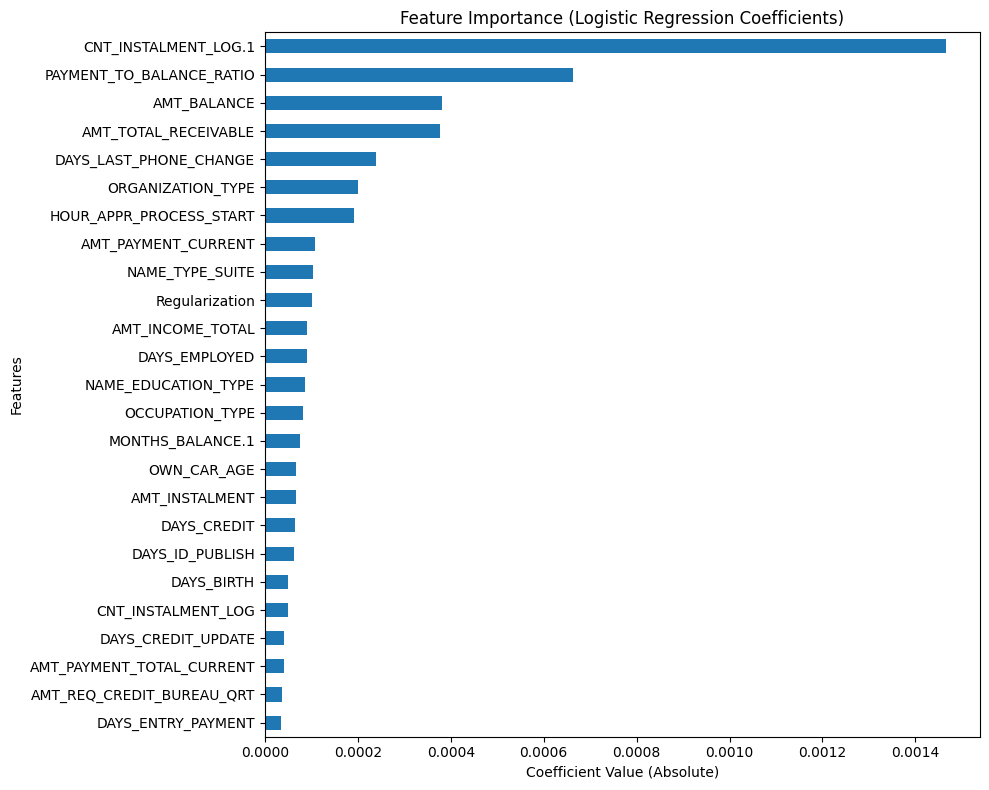

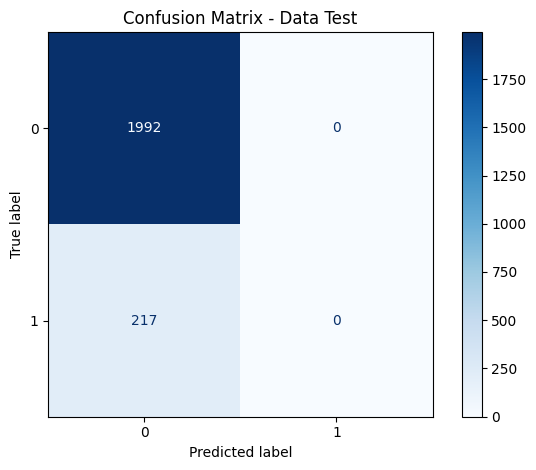

In [52]:
# Mengimpor SMOTE
from imblearn.over_sampling import SMOTE

# Mengaplikasikan SMOTE untuk mengatasi masalah ketidakseimbangan kelas pada data train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Set max_iter to ensure convergence
log_reg.fit(X_train, y_train)

# Evaluasi model dengan metrik seperti accuracy, precision, recall, dsb.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def eval_classification(model):
    y_pred = model.predict(X_test)  # Prediksi untuk data test
    y_pred_train = model.predict(X_train_smote)  # Prediksi untuk data train yang sudah di-resample
    y_pred_proba = model.predict_proba(X_test)  # Probabilitas prediksi untuk data test
    y_pred_proba_train = model.predict_proba(X_train_smote)  # Probabilitas prediksi untuk data train yang sudah di-resample
    
    # Mencetak hasil evaluasi
    print('Accuracy (Train Set)    : %.2f' % accuracy_score(y_train_smote, y_pred_train))
    print('Accuracy (Test Set)     : %.2f' % accuracy_score(y_test, y_pred))

    print('Precision (Train Set)   : %.2f' % precision_score(y_train_smote, y_pred_train))
    print('Precision (Test Set)    : %.2f' % precision_score(y_test, y_pred))

    print('Recall (Train Set)      : %.2f' % recall_score(y_train_smote, y_pred_train))
    print('Recall (Test Set)       : %.2f' % recall_score(y_test, y_pred))

    print('F1-Score (Train Set)    : %.2f' % f1_score(y_train_smote, y_pred_train))
    print('F1-Score (Test Set)     : %.2f' % f1_score(y_test, y_pred))

    print('ROC-AUC (Train-Proba)   : %.2f' % roc_auc_score(y_train_smote, y_pred_proba_train[:, 1]))
    print('ROC-AUC (Test-Proba)    : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

# Evaluasi model
eval_classification(log_reg)

# Cross-validation untuk mengukur performa model secara lebih robust
from sklearn.model_selection import cross_validate
def score_cross_validate(model):
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (Crossval Train) : %.2f' % score['train_score'].mean())
    print('Recall (Crossval Test)  : %.2f' % score['test_score'].mean())

score_cross_validate(log_reg)

# Menampilkan fitur yang paling penting berdasarkan model
import pandas as pd
import matplotlib.pyplot as plt

def show_feature_importance(model):
    # Use the model's coefficients as feature importance
    feat_importances = pd.Series(model.coef_[0], index=X.columns)
    ax = feat_importances.abs().nlargest(25).plot(kind='barh', figsize=(10, 8))  # Use absolute values for importance
    ax.invert_yaxis()  # Reverse the order for better visualization
    plt.title('Feature Importance (Logistic Regression Coefficients)')
    plt.xlabel('Coefficient Value (Absolute)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# Call the function
show_feature_importance(log_reg)

# Menampilkan confusion matrix untuk hasil prediksi
def show_confusion_matrix(model):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Data Test')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(log_reg)

In [54]:
def calculate_default_rate(model, X, y, dataset_name="dataset", threshold=0.5):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    - threshold: Batas probabilitas untuk menentukan prediksi default (default: 0.5).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Mengonversi probabilitas menjadi prediksi default
    y_pred_default = (y_pred_proba > threshold).astype(int)
    
    # Menghitung jumlah prediksi default dan total
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"Default rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")
    
    return default_rate

In [56]:
# Default rate untuk data train setelah SMOTE
calculate_default_rate(log_reg, X_train_smote, y_train_smote, dataset_name="train (SMOTE)")

# Default rate untuk data test
calculate_default_rate(log_reg, X_test, y_test, dataset_name="test")

Default rate untuk dataset train (SMOTE):
Jumlah prediksi default: 0
Jumlah total: 15928
Tingkat default prediksi: 0.00%
Default rate untuk dataset test:
Jumlah prediksi default: 0
Jumlah total: 2209
Tingkat default prediksi: 0.00%


0.0

### SMOTE dan IQR

In [58]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd

In [60]:
# Split dataset menjadi data train dan test
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
# Fungsi untuk menangani outliers dengan IQR (data train)
def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers pada data train
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Fungsi untuk menerapkan batas IQR pada data test berdasarkan data train
def apply_train_iqr_bounds(data, train_data, columns):
    for col in columns:
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers pada data test
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Terapkan IQR pada data train
columns_to_check = X_train.select_dtypes(include=[np.number]).columns  # Hanya kolom numerik
X_train = handle_outliers_iqr(X_train.copy(), columns_to_check)

# Terapkan capping pada data test menggunakan batas dari data train
X_test = apply_train_iqr_bounds(X_test.copy(), X_train, columns_to_check)

Accuracy (Train Set)    : 0.50
Accuracy (Test Set)     : 0.90
Precision (Train Set)   : 0.00
Precision (Test Set)    : 0.00
Recall (Train Set)      : 0.00
Recall (Test Set)       : 0.00
F1-Score (Train Set)    : 0.00
F1-Score (Test Set)     : 0.00
ROC-AUC (Train-Proba)   : 0.63
ROC-AUC (Test-Proba)    : 0.61
Recall (Crossval Train) : 0.00
Recall (Crossval Test)  : 0.00


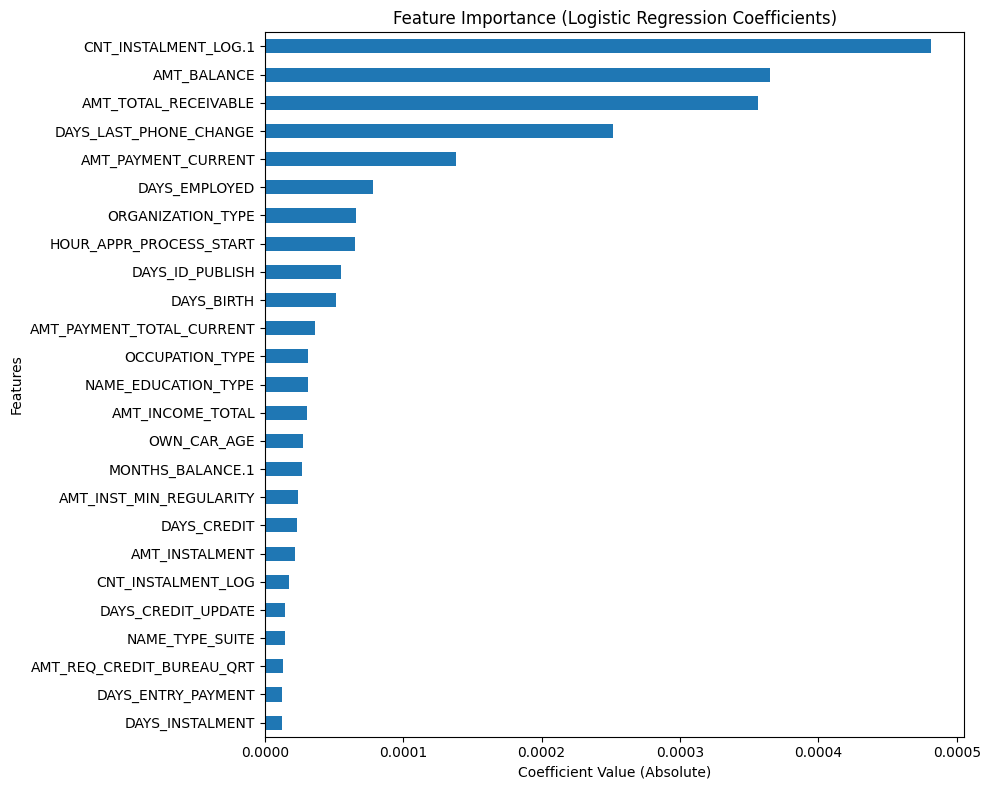

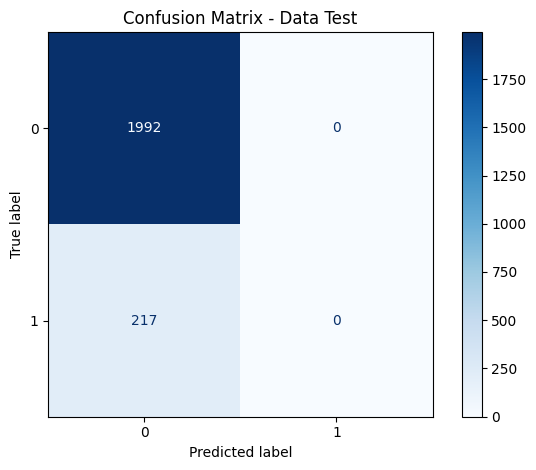

In [64]:
# Terapkan SMOTE setelah menghapus outliers
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Set max_iter to ensure convergence
log_reg.fit(X_train, y_train)

# Evaluasi model
def eval_classification(model):
    y_pred = model.predict(X_test)  # Prediksi untuk data test
    y_pred_train = model.predict(X_train_resampled)  # Prediksi untuk data train
    y_pred_proba = model.predict_proba(X_test)  # Probabilitas prediksi untuk data test
    y_pred_proba_train = model.predict_proba(X_train_resampled)  # Probabilitas prediksi untuk data train
    
    # Mencetak hasil evaluasi
    print('Accuracy (Train Set)    : %.2f' % accuracy_score(y_train_resampled, y_pred_train))
    print('Accuracy (Test Set)     : %.2f' % accuracy_score(y_test, y_pred))

    print('Precision (Train Set)   : %.2f' % precision_score(y_train_resampled, y_pred_train))
    print('Precision (Test Set)    : %.2f' % precision_score(y_test, y_pred))

    print('Recall (Train Set)      : %.2f' % recall_score(y_train_resampled, y_pred_train))
    print('Recall (Test Set)       : %.2f' % recall_score(y_test, y_pred))

    print('F1-Score (Train Set)    : %.2f' % f1_score(y_train_resampled, y_pred_train))
    print('F1-Score (Test Set)     : %.2f' % f1_score(y_test, y_pred))

    print('ROC-AUC (Train-Proba)   : %.2f' % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))
    print('ROC-AUC (Test-Proba)    : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

# Evaluasi model
eval_classification(log_reg)

# Cross-validation untuk mengukur performa model secara lebih robust
def score_cross_validate(model):
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (Crossval Train) : %.2f' % score['train_score'].mean())
    print('Recall (Crossval Test)  : %.2f' % score['test_score'].mean())

score_cross_validate(log_reg)

# Menampilkan fitur yang paling penting berdasarkan model
def show_feature_importance(model):
    # Use the model's coefficients as feature importance
    feat_importances = pd.Series(model.coef_[0], index=X.columns)
    ax = feat_importances.abs().nlargest(25).plot(kind='barh', figsize=(10, 8))  # Use absolute values for importance
    ax.invert_yaxis()  # Reverse the order for better visualization
    plt.title('Feature Importance (Logistic Regression Coefficients)')
    plt.xlabel('Coefficient Value (Absolute)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# Call the function
show_feature_importance(log_reg)

# Menampilkan confusion matrix untuk hasil prediksi
def show_confusion_matrix(model):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Data Test')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(log_reg)

In [66]:
# Menghitung default rate berdasarkan probabilitas
def calculate_default_rate(model, X, y, dataset_name="dataset", threshold=0.5):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    - threshold: Batas probabilitas untuk menentukan prediksi default (default: 0.5).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Mengonversi probabilitas menjadi prediksi default
    y_pred_default = (y_pred_proba > threshold).astype(int)
    
    # Menghitung jumlah prediksi default dan total
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"Default rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")
    
    return default_rate

# Hitung default rate setelah model dievaluasi pada dataset train dan test
print("\nHasil Default Rate pada Dataset Train:")
calculate_default_rate(log_reg, X_train_resampled, y_train_resampled, dataset_name="Train Set")

# Hitung default rate setelah model dievaluasi
calculate_default_rate(log_reg, X_test, y_test, dataset_name="Test Set")


Hasil Default Rate pada Dataset Train:
Default rate untuk dataset Train Set:
Jumlah prediksi default: 0
Jumlah total: 15928
Tingkat default prediksi: 0.00%
Default rate untuk dataset Test Set:
Jumlah prediksi default: 0
Jumlah total: 2209
Tingkat default prediksi: 0.00%


0.0

### IQR, SMOTE, Hyperparameter tuning

In [68]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
import numpy as np
import pandas as pd

In [70]:
# Split dataset menjadi data train dan test
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [72]:
# Fungsi untuk menangani outliers menggunakan IQR pada data train
def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Capping outliers pada data train
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Fungsi untuk menerapkan batas IQR yang dihitung dari data train ke data test
def apply_train_iqr_bounds(data, train_data, columns):
    for col in columns:
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Capping outliers pada data test
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

In [74]:
# 3. Menangani Outliers menggunakan IQR pada data train
columns_to_check = X_train.select_dtypes(include=[np.number]).columns
X_train = handle_outliers_iqr(X_train.copy(), columns_to_check)
X_test = apply_train_iqr_bounds(X_test.copy(), X_train, columns_to_check)

# 4. Menggunakan SMOTE untuk menangani ketidakseimbangan kelas di data train
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', None],  # Types of regularization
        'C': [0.01, 0.1, 1, 10, 100],               # Inverse of regularization strength
        'solver': ['lbfgs', 'liblinear', 'saga'],   # Solvers for optimization
        'max_iter': [100, 500, 1000]                # Maximum number of iterations
    }

    grid_search = GridSearchCV(
        estimator=LogisticRegression(random_state=42), 
        param_grid=param_grid, 
        cv=3, 
        n_jobs=-1, 
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")
    
    return grid_search.best_estimator_

best_model = tune_hyperparameters(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.6845807324543465


In [78]:
# 6. Evaluasi Model: Metrik Accuracy, Precision, Recall, F1-Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('Accuracy (Train Set)    : %.2f' % accuracy_score(y_train, y_pred_train))
    print('Accuracy (Test Set)     : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Train Set)   : %.2f' % precision_score(y_train, y_pred_train))
    print('Precision (Test Set)    : %.2f' % precision_score(y_test, y_pred))
    print('Recall (Train Set)      : %.2f' % recall_score(y_train, y_pred_train))
    print('Recall (Test Set)       : %.2f' % recall_score(y_test, y_pred))
    print('F1-Score (Train Set)    : %.2f' % f1_score(y_train, y_pred_train))
    print('F1-Score (Test Set)     : %.2f' % f1_score(y_test, y_pred))
    print('ROC-AUC (Train-Proba)   : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print('ROC-AUC (Test-Proba)    : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

eval_classification(best_model, X_train_resampled, y_train_resampled, X_test, y_test)

Accuracy (Train Set)    : 0.69
Accuracy (Test Set)     : 0.67
Precision (Train Set)   : 0.69
Precision (Test Set)    : 0.17
Recall (Train Set)      : 0.70
Recall (Test Set)       : 0.62
F1-Score (Train Set)    : 0.69
F1-Score (Test Set)     : 0.27
ROC-AUC (Train-Proba)   : 0.75
ROC-AUC (Test-Proba)    : 0.71


In [80]:
# Cross-Validation untuk Mengukur Performa Model
def score_cross_validate(model, X, y):
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (Crossval Train) : %.2f' % score['train_score'].mean())
    print('Recall (Crossval Test)  : %.2f' % score['test_score'].mean())

# Menjalankan cross-validation pada model terbaik
score_cross_validate(best_model, X_train_resampled, y_train_resampled)

Recall (Crossval Train) : 0.70
Recall (Crossval Test)  : 0.69


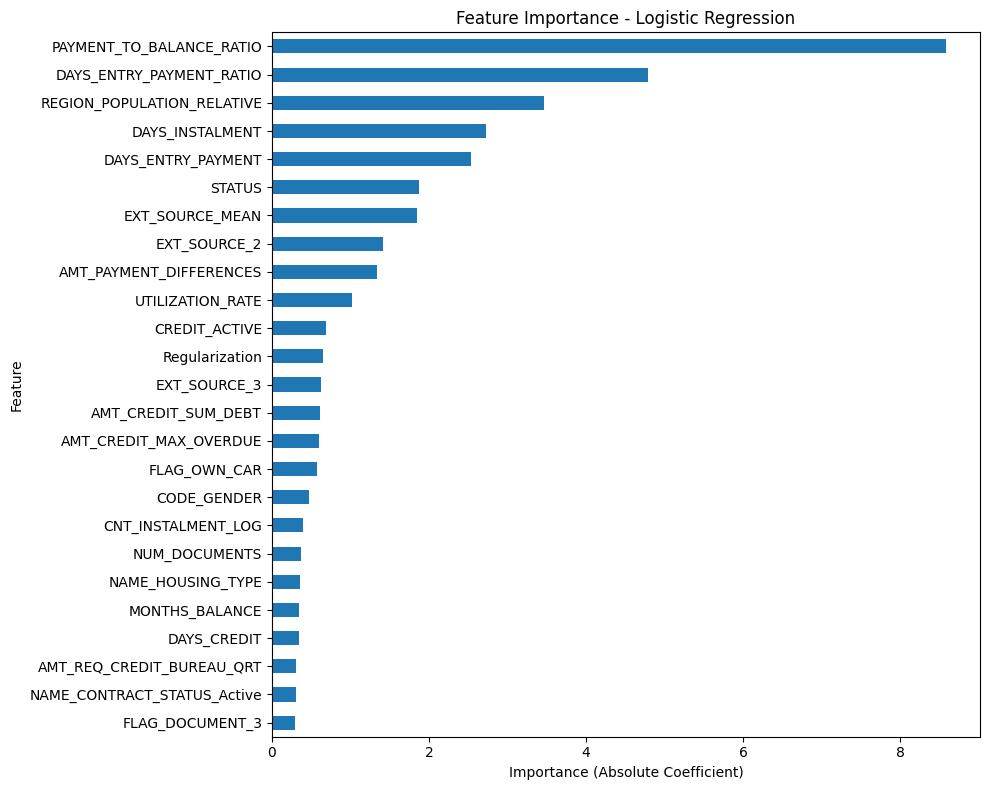

In [84]:
def show_feature_importance(model, X):
    # Use model coefficients as feature importance
    feat_importances = pd.Series(model.coef_[0], index=X.columns)
    ax = feat_importances.abs().nlargest(25).plot(kind='barh', figsize=(10, 8))  # Use absolute values for ranking
    ax.invert_yaxis()  # Reverse the order for better visualization
    plt.xlabel('Importance (Absolute Coefficient)')
    plt.ylabel('Feature')
    plt.title('Feature Importance - Logistic Regression')
    plt.tight_layout()
    plt.show()

# Menampilkan fitur penting untuk model yang sudah di-tune
show_feature_importance(best_model, X_train_resampled)

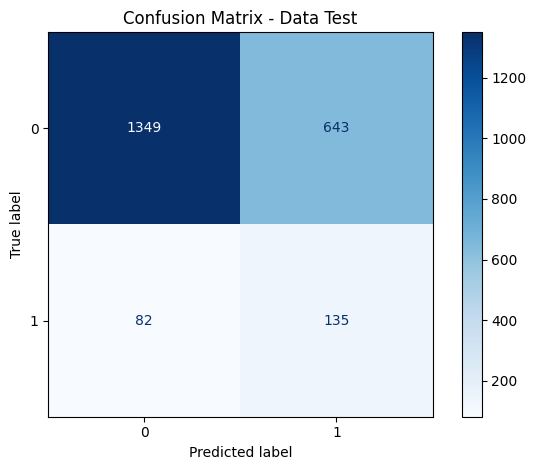

In [86]:
# Menampilkan Confusion Matrix untuk Hasil Prediksi

def show_confusion_matrix(model, X_test, y_test):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Data Test')
    plt.tight_layout()
    plt.show()

# Menampilkan confusion matrix untuk data test
show_confusion_matrix(best_model, X_test, y_test)

In [88]:
# Menghitung Default Rate pada Data Train dan Test
def calculate_default_rate(model, X, y, dataset_name="dataset", threshold=0.5):
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred_default = (y_pred_proba > threshold).astype(int)
    
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    default_rate = default_count / total_count if total_count > 0 else 0
    
    print(f"Default rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")
    
    return default_rate

# Hitung default rate untuk data train dan test
print("\nHasil Default Rate pada Dataset Train:")
calculate_default_rate(best_model, X_train_resampled, y_train_resampled, dataset_name="Train Set")

print("\nHasil Default Rate pada Dataset Test:")
calculate_default_rate(best_model, X_test, y_test, dataset_name="Test Set")


Hasil Default Rate pada Dataset Train:
Default rate untuk dataset Train Set:
Jumlah prediksi default: 8107
Jumlah total: 15928
Tingkat default prediksi: 50.90%

Hasil Default Rate pada Dataset Test:
Default rate untuk dataset Test Set:
Jumlah prediksi default: 778
Jumlah total: 2209
Tingkat default prediksi: 35.22%


0.35219556360344045